The result of the band structure of a single band tight-binding model with different overlap strength: 
     S = alpha * H
where H and S are Hamiltonian and Overlap matrix, alpha controls the overlap strength.
alpha = 0 means no overlap
It is clear that antibonding states become more anti-bonding with increasing overlap matrix


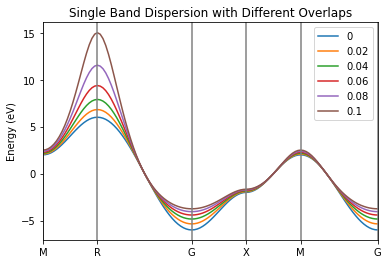

In [10]:
%matplotlib inline

import numpy as np
from automaticTB.tightbinding.models import SingleBand_TB
from automaticTB.properties.bandstructure import BandStructureResult
import matplotlib.pyplot as plt
from automaticTB.examples.kpaths import cubic_kpath

testfilename = "result_singleband_with_overlap.pdf"
overlaps = [0, 0.02, 0.04, 0.06, 0.08, 0.1]
Es = []
for overlap in overlaps:
    SingleBand_TB.overlap = overlap
    tb = SingleBand_TB()
    band_result = BandStructureResult.from_tightbinding_and_kpath(tb, cubic_kpath)
    x = band_result.x
    Es.append(band_result.E)
    ticks = band_result.ticks
    
fig = plt.figure()
axes = fig.subplots()

axes.set_title("Single Band Dispersion with Different Overlaps")
axes.set_ylabel("Energy (eV)")
ymin = np.min(Es)
ymax = np.max(Es)
ymin = ymin - (ymax - ymin) * 0.05
ymax = ymax + (ymax - ymin) * 0.05

axes.set_xlim(min(x), max(x))
axes.set_ylim(ymin, ymax)

for overlap, E in zip(overlaps, Es):
    axes.plot(x, E, label = str(overlap))
for tick in ticks:
    x = tick.xpos
    axes.plot([x,x], [ymin,ymax], color='gray')

tick_x = [ tick.xpos for tick in ticks ]
tick_s = [ tick.symbol for tick in ticks ]
axes.xaxis.set_major_locator(plt.FixedLocator(tick_x))
axes.xaxis.set_major_formatter(plt.FixedFormatter(tick_s))
axes.legend()

print("The result of the band structure of a single band tight-binding model with different overlap strength: ")
print("     S = alpha * H")
print("where H and S are Hamiltonian and Overlap matrix, alpha controls the overlap strength.")
print("alpha = 0 means no overlap")
print("It is clear that antibonding states become more anti-bonding with increasing overlap matrix")
# fig.savefig(testfilename)